# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# printing the number of columns and rows with the shape function
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations: Each row represents a new order and there are 1898 orders in this dataset. Each column represents a description of the order and there are 9 descriptions that make an order unique.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# printing the types of data types included in the dataset
print("\nThe datatypes included in this dataset are:\n", df.dtypes)


The datatypes included in this dataset are:
 order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                     int64
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations: There are 3 datatypes present in the dataset: int64, object, and float64.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# running sanity checks

# checking for null values
print(df.isnull().sum(), "\n")

# getting unique list of restaurant names
print(df['restaurant_name'].unique(), "\n")

# getting value counts of cuisine type
print(df['cuisine_type'].value_counts(), "\n")

# making sure there is no orders for $0
print("Lowest purchase order:", df['cost_of_the_order'].min(), "\n")

# getting value counts of day of the week
print(df['day_of_the_week'].value_counts(), "\n")

# getting value counts of rating
print(df['rating'].value_counts(), "\n")

# ensuring there is no 0 minute preparation time
print("Fastest preparation time:", df['food_preparation_time'].min(), "\n")

# ensuring there is no 0 minute delivery time
print("Fastest delivery time:", df['delivery_time'].min(), "\n")

# checking for duplicates
print("Number of duplicates:", df.duplicated().sum(), "\n")

# function to convert 'object' values in 'rating' into integers
def convert_rating(rating):
    try:
        return int(rating)
    except ValueError:
        return None

# using apply function to the 'rating' column
df['rating'] = df['rating'].apply(convert_rating)

# using -1 as integer placeholder for 'Not given' entries
df['rating'].fillna(-1, inplace=True)

# converting the column type
df['rating'] = df['rating'].astype(int)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64 

['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda"

#### Observations: There is a large percentage of 'Not given' ratings and there presence neither hurts or helps the ratings of the restaurants, therefore I will leave them in the dataset. However, I will change the column type to integer and replace the 'Not given' entries to -1 for easier data manipulation later.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# using the min function to see the minimum food preparation time
print("The minimum preparation time taken is", df['food_preparation_time'].min())

# using the mean function to see the average food preparation time
print("The average preparation time taken is", '%.2f'%df['food_preparation_time'].mean())

# using the max function to see the maximum food preparation time
print("The maximum preparation time taken is", df['food_preparation_time'].max())

The minimum preparation time taken is 20
The average preparation time taken is 27.37
The maximum preparation time taken is 35


#### Observations: All of the food preparation times are rounded to the nearest minute and all times are between 20 and 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# using the value_counts function to see how many orders are not rated
print("The number of orders not rated is", df['rating'].value_counts()[-1])

The number of orders not rated is 736


#### Observations: There is a large number of not rated orders (736/1898), I assume since the prompt for the food to be rated comes after the customers are done receiving their food and have been satisfied.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# order_id
# ensuring that there are no duplicate order ID's
df['order_id'].duplicated().sum()

# OBSERVATIONS:
# There are no duplicates and all ID's are unique.

0

<Axes: xlabel='number of orders'>

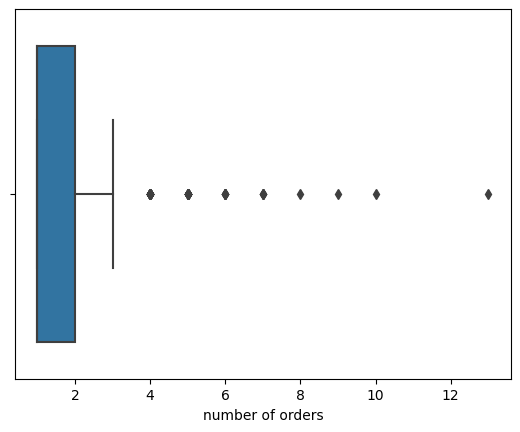

In [ ]:
# customer_id boxplot with the groupby function to show the number of orders per customer_id by creating a new dataframe with value counts
# to visulize the outliers and common amount of orders
temp_customer_id_orders = pd.DataFrame(df['customer_id'].value_counts().rename_axis('customer_id').reset_index(name='number of orders'))
sns.boxplot(x=temp_customer_id_orders['number of orders'])

# OBSERVATIONS:
# There are 8 outliers and a few customers that regularly place orders but most of the
# customers are distributed in the one to two orders region.

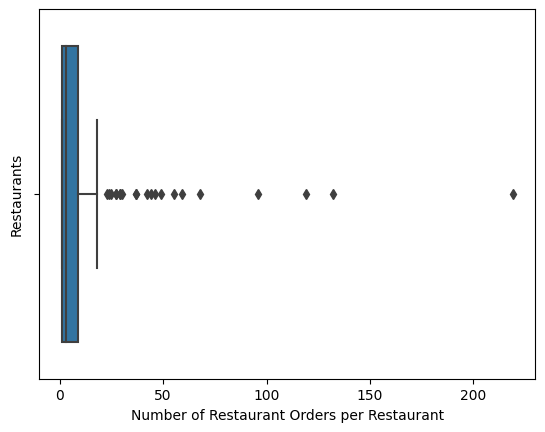

             restaurant_name  number of orders
0                Shake Shack               219
1          The Meatball Shop               132
2          Blue Ribbon Sushi               119
3  Blue Ribbon Fried Chicken                96
4                       Parm                68 

Median:  3.0


In [ ]:
# restuarant_name boxplot to show the distribution of the total number of restaurant orders by creating a new dataframe with value counts
temp_restuarant_name_orders = pd.DataFrame(df['restaurant_name'].value_counts().rename_axis('restaurant_name').reset_index(name='Number of Restaurant Orders per Restaurant'))
sns.boxplot(data=temp_restuarant_name_orders, x=temp_restuarant_name_orders['Number of Restaurant Orders per Restaurant'])
plt.ylabel('Restaurants')
plt.show()

# using value_counts to get data then moving the resulting series into a DataFrame with the respective columns
temp_top_5 = pd.DataFrame(df['restaurant_name'].value_counts().rename_axis('restaurant_name').reset_index(name='number of orders'))

# printing results
print(temp_top_5[:5], "\n")

# printing the median
print("Median: ", temp_top_5['number of orders'].median())

# OBSERVATIONS:
# There are quite a few outliers in the box plot with 'shake shack' having nearly 100 more orders than the second restaurant.
# The median number of orders per resturant being 3.

<Axes: xlabel='cuisine_type', ylabel='count'>

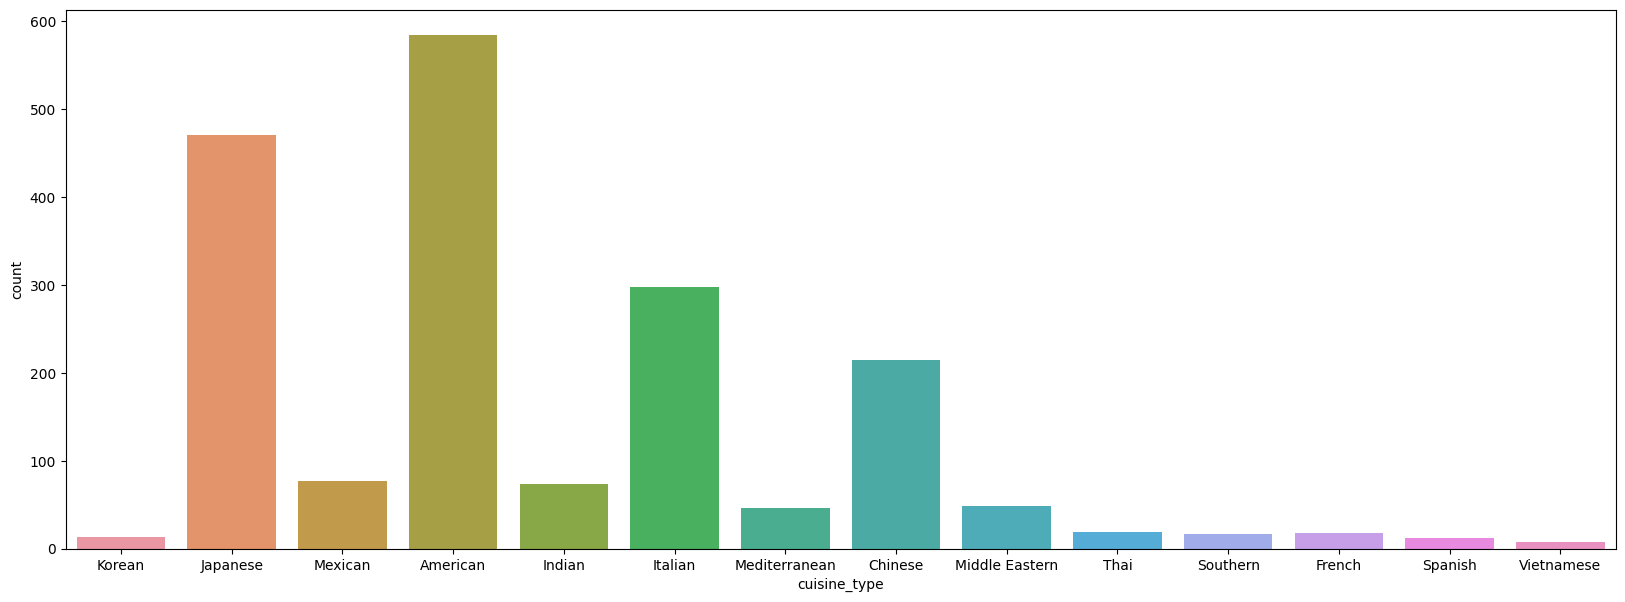

In [ ]:
# cuisine type displayed by a count plot
plt.figure(figsize=(20,7))
sns.countplot(data=df, x=df['cuisine_type'])

# OBSERVATIONS:
# Top 3 cuisines are American, Japanese, and Italian.
# Bottom 5 cuisines are Vietnamese, Korean, Spanish, French, and Southern.

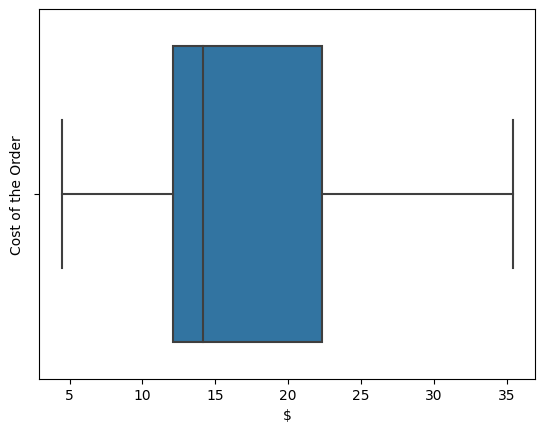

Median:  14.14


In [ ]:
# cost_of_the_order displayed by a boxplot
sns.boxplot(data=df, x='cost_of_the_order')
plt.xlabel('$')
plt.ylabel('Cost of the Order')
plt.show()

print("Median: ", df['cost_of_the_order'].median())

# OBSERVATIONS:
# Most Expensive: $35
# Least Expensive: $20
# Median $14.14

<Axes: xlabel='day_of_the_week', ylabel='count'>

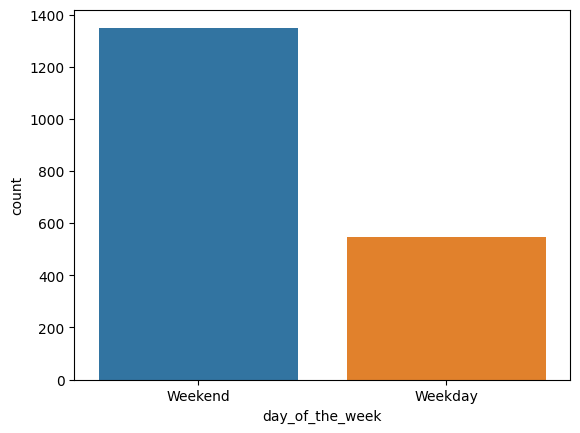

In [ ]:
# day_of_the_week histogram to display the number of weekend vs weekday orders
sns.countplot(data=df, x='day_of_the_week')

# OBSERVATIONS:
# There are more than twice as many weekend and weekday orders.

<Axes: xlabel='rating', ylabel='count'>

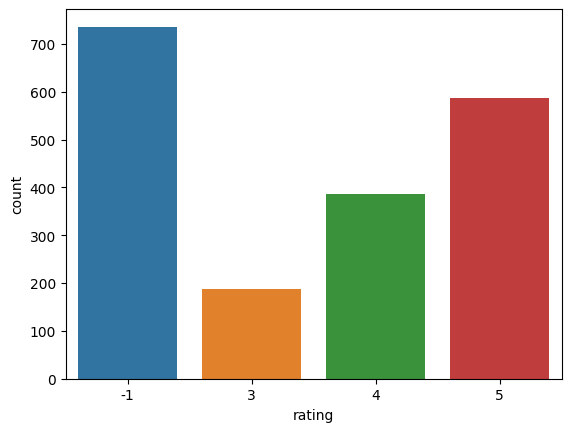

In [ ]:
# rating displayed through count plot
sns.countplot(data=df, x='rating')

# OBSERVATIONS:
# 'Not given' ratings are most common with 5 being the next most common and 3 being the least.
# There are no 1 or 2 ratings.

<Axes: xlabel='food_preparation_time', ylabel='count'>

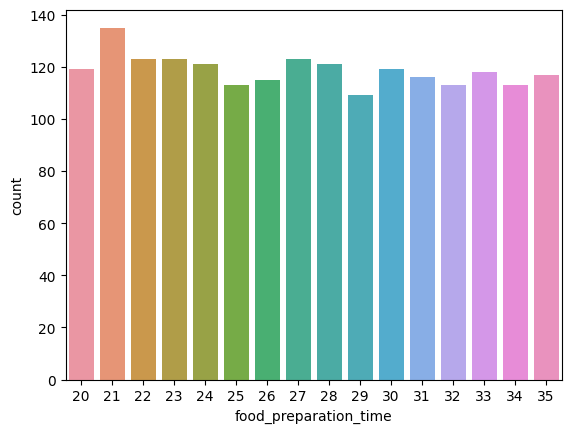

In [ ]:
# food_preparation_time distributed through count plot since all times are rounded to nearest integer
sns.countplot(data=df, x='food_preparation_time')

# OBSERVATIONS:
# Food preparations times have an almost equal distribution.

<Axes: xlabel='delivery_time', ylabel='count'>

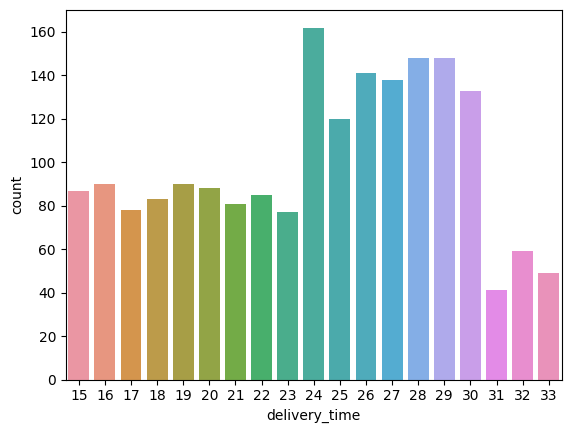

In [ ]:
# delivery_time
sns.countplot(data=df, x='delivery_time')

# OBSERVATIONS:
# The most common delivery times fall within 24 and 30 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# using value_counts to get data then moving the resulting series into a DataFrame with the respective columns
temp_top_5 = pd.DataFrame(df['restaurant_name'].value_counts().rename_axis('restaurant_name').reset_index(name='number of orders'))

# printing results
temp_top_5[:5]

,restaurant_name,number of orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations: The top restaurant 'Shake Shack' is extremely popular on this ordering app, while the following 3 have similar amounts of orders and then the number begins to decrease noticeably.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# using groupby function to see which cusinies are ordered most frequently on the weekend
top_cuisines = df.groupby(['day_of_the_week'])['cuisine_type'].value_counts().reset_index(name='orders')
print(top_cuisines)

# printing results
print("The most popular cuisine on the weekends is", top_cuisines['cuisine_type'].loc[0])

   day_of_the_week    cuisine_type  orders
0          Weekday        American     169
1          Weekday        Japanese     135
2          Weekday         Italian      91
3          Weekday         Chinese      52
4          Weekday          Indian      24
5          Weekday         Mexican      24
6          Weekday  Middle Eastern      17
7          Weekday   Mediterranean      14
8          Weekday        Southern       6
9          Weekday          French       5
10         Weekday            Thai       4
11         Weekday      Vietnamese       3
12         Weekday          Korean       2
13         Weekday         Spanish       1
14         Weekend        American     415
15         Weekend        Japanese     335
16         Weekend         Italian     207
17         Weekend         Chinese     163
18         Weekend         Mexican      53
19         Weekend          Indian      49
20         Weekend   Mediterranean      32
21         Weekend  Middle Eastern      32
22         

#### Observations: American, Japanese, Italian, and Chinese are very poular on the weekends. The same is true for the weekday but the orders are considerably less. American is the most popular cuisine type on the weekend and in general.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# storing the orders over 20 dollars into a temporary dataframe
temp_orders_over_20 = df[df['cost_of_the_order'] > 20]

# calculating the percentage of orders over 20
percentage_over_20 = (temp_orders_over_20.shape[0] / df.shape[0]) * 100

# printing results
print("The percentage of orders more than 20 dollars is %", '%.2f'%percentage_over_20, sep='')

The percentage of orders more than 20 dollars is %29.24


#### Observations: Roughly 29.24% of orders cost more than 20 dollars in the dataset.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# printing results using the mean function
print("The mean order delivery time is", '%.2f'%df['delivery_time'].mean(), "minutes")

The mean order delivery time is 24.16 minutes


#### Observations: The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# using value_counts to get data then moving the resulting series into a DataFrame with the respective columns
temp_top_3 = pd.DataFrame(df['customer_id'].value_counts().rename_axis('customer_id').reset_index(name='number of orders'))

# printing results
temp_top_3[:3]

,customer_id,number of orders
0,52832,13
1,47440,10
2,83287,9


#### Observations: The top three customer ID's based on number of orders are 52832, 47440, and 823287.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


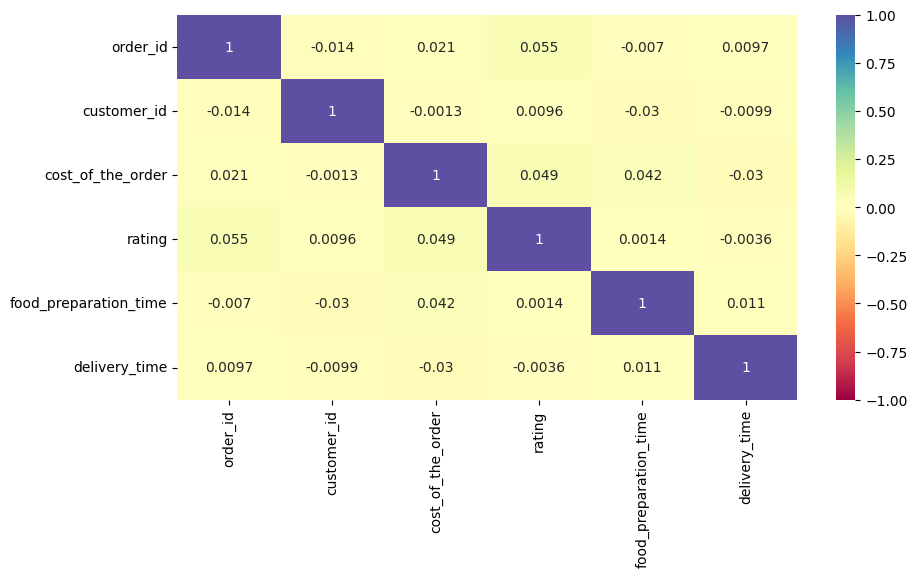

In [ ]:
# heatmap to show correlation between variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1,)
plt.show()

# OBSERVATIONS:
# There are no obvious correlations between the numerical variables in the dataset. Expected at least for the cost_of_the_order
# and food_preparation_time to have some sort of linear relationship.

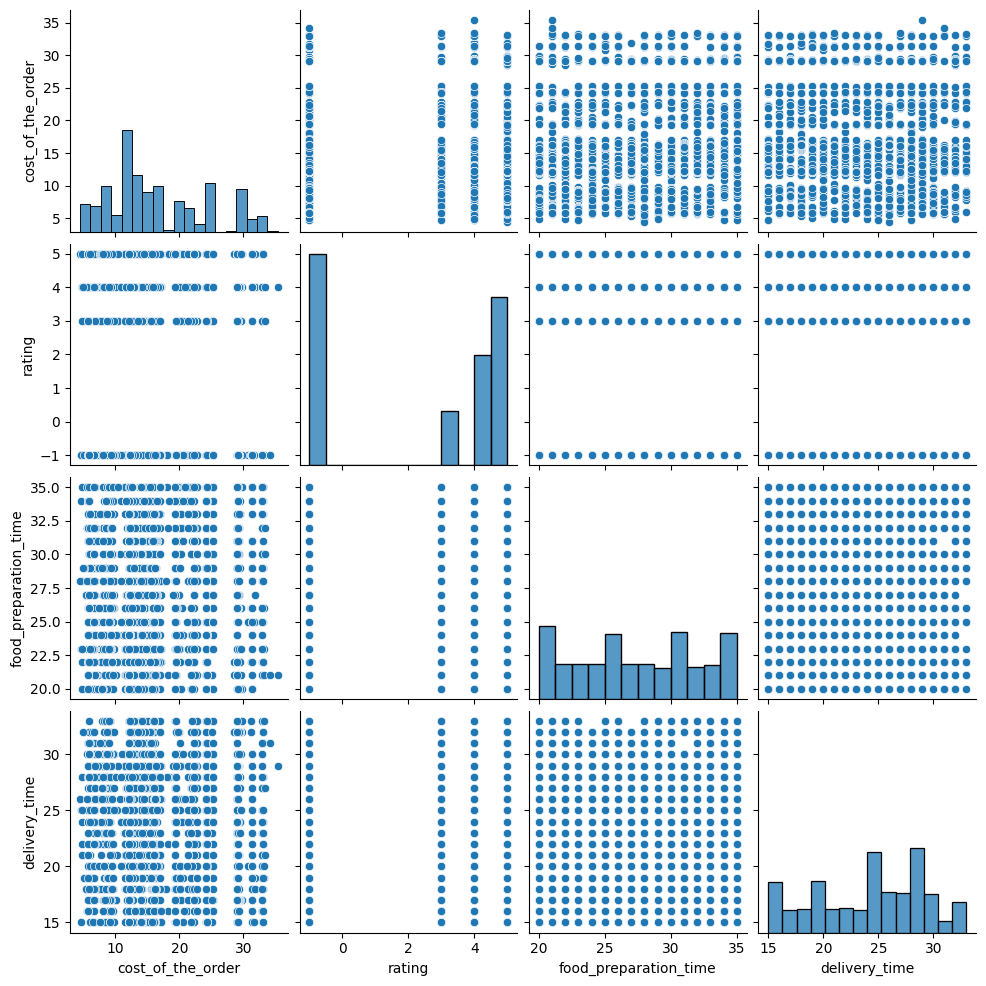

In [ ]:
# creating pairplot to see overall view of numerical data
sns.pairplot(df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']])
plt.show()

# OBSERVATIONS: Again, there is almost a complete distribution throughout the numerical variables. There is a random gap between
# cost_of_the_order and food_preparation_time but I assume that is the result of whatever random function this data was generated by.

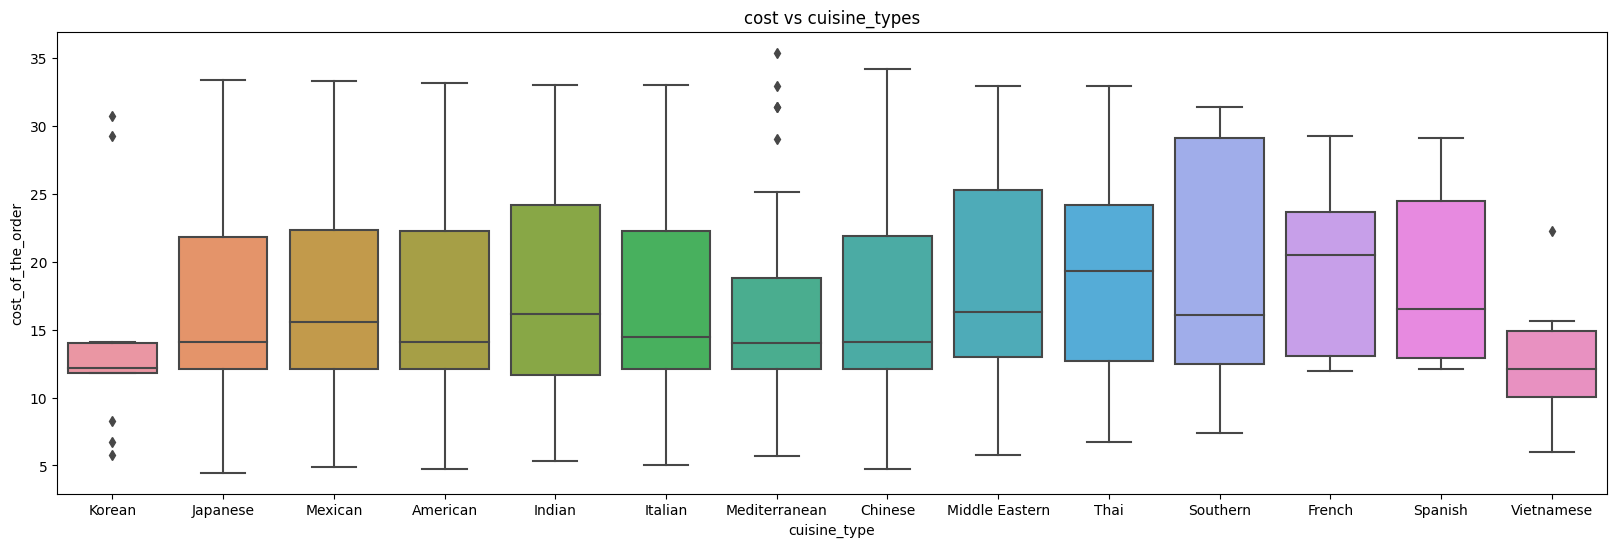

In [ ]:
# displaying boxplot to showcase cost versus cusine_types
plt.figure(figsize=(20, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('cost vs cuisine_types')
plt.show()

# OBSERVATIONS: Most cusines seem to be equally distributed with most medians hovering around 15 dollars. The highest median appear to be french.
# Korean and Mediterranean have several outliers in their plots but those cuisines typically have group or family style of ordering.

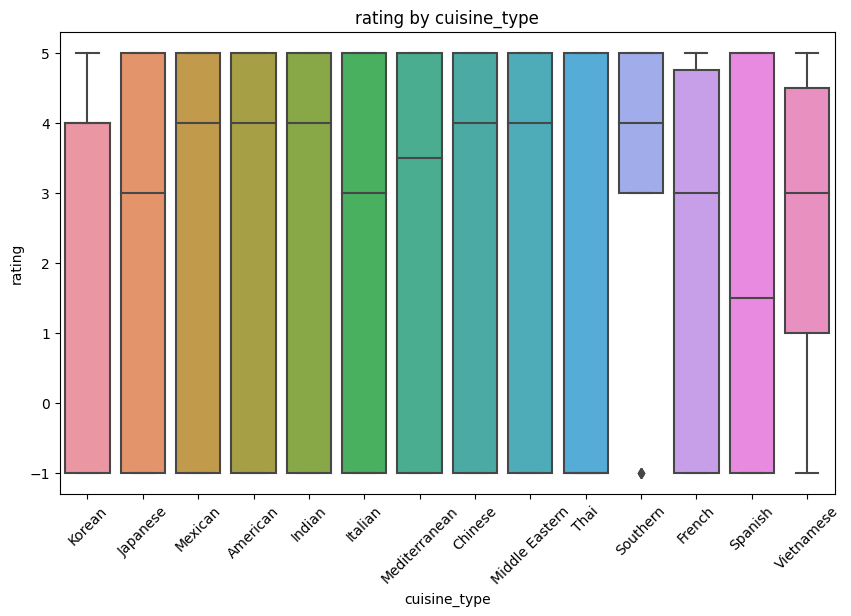

In [ ]:
# displaying boxplot to showcase the rating by each cuisine_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='rating', data=df)
plt.title('rating by cuisine_type')
plt.xlabel('cuisine_type')
plt.ylabel('rating')
# rotating x-axis labels for less clutter
plt.xticks(rotation=45)
plt.show()

# OBSERVATIONS:
# There is many 'Not given' ratings and for some of the lower restaurant orders, southern, there is not enough data to
# get an accurate rating on each cuisine. Hence the southern food is highly skewed in the 5 and 4 region.

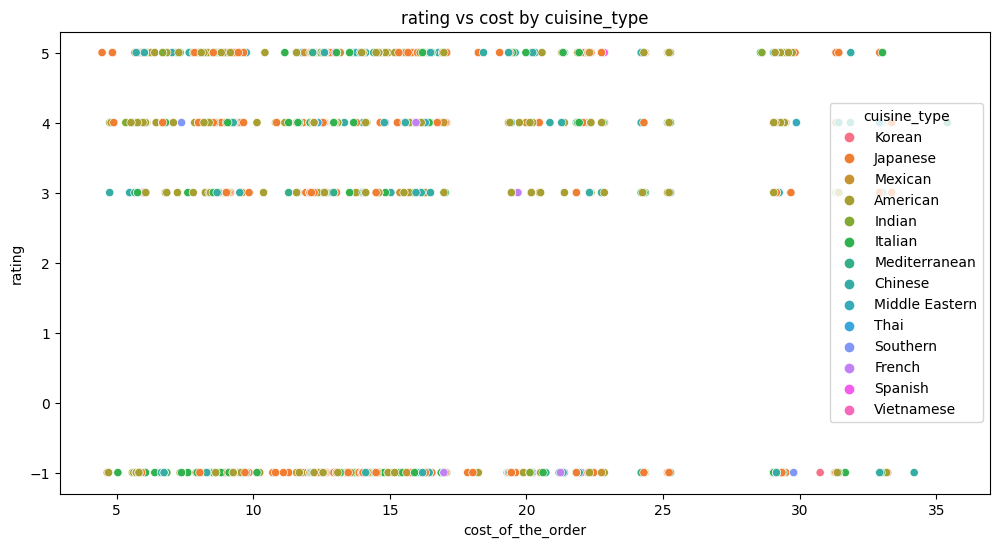

In [ ]:
# displaying scatterplot to showcase rating, cost_of_the_order, and cuisine_type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cost_of_the_order', y='rating', hue='cuisine_type', data=df)
plt.title('rating vs cost by cuisine_type')
plt.show()

# OBSERVATIONS:
# There is a right-skewed distribution of the cost when looking at the rating and cost. Therefore, the order is more likely to be
# rated if the cost is lower.

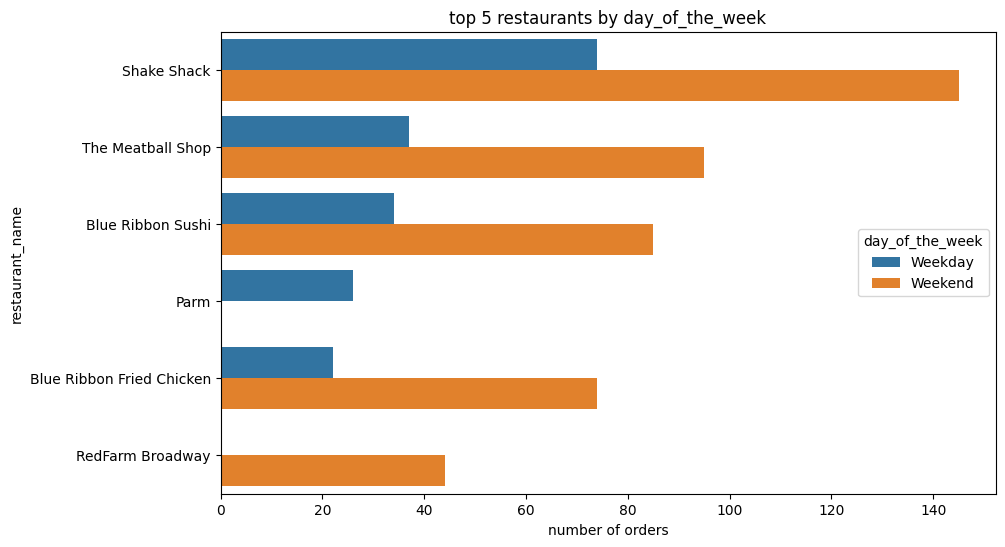

In [ ]:
# finding the top_cuisines during the week
top_restaurants = df.groupby(['restaurant_name'])['day_of_the_week'].value_counts().reset_index(name='orders')

# finding the top cuisines during the weekday
top_5_weekday = top_restaurants[top_restaurants['day_of_the_week'] == 'Weekday'].nlargest(5, 'orders')

# finding the top cuisines during the weekend
top_5_weekend = top_restaurants[top_restaurants['day_of_the_week'] == 'Weekend'].nlargest(5, 'orders')

# concating the two series for visualization
top_5_combined = pd.concat([top_5_weekday.assign(day_of_the_week='Weekday'),
                            top_5_weekend.assign(day_of_the_week='Weekend')])

# Creating a count plot to visualize top 5 restaurants by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='orders', y='restaurant_name', hue='day_of_the_week', data=top_5_combined)
plt.title('top 5 restaurants by day_of_the_week')
plt.xlabel('number of orders')
plt.ylabel('restaurant_name')
plt.legend(title='day_of_the_week')
plt.show()

# OBSERVATIONS:
# There are two restaurants in the top 5 of graph that apparently only do orders on either weekday or weekend. The weekend by far recieves the most
# orders.

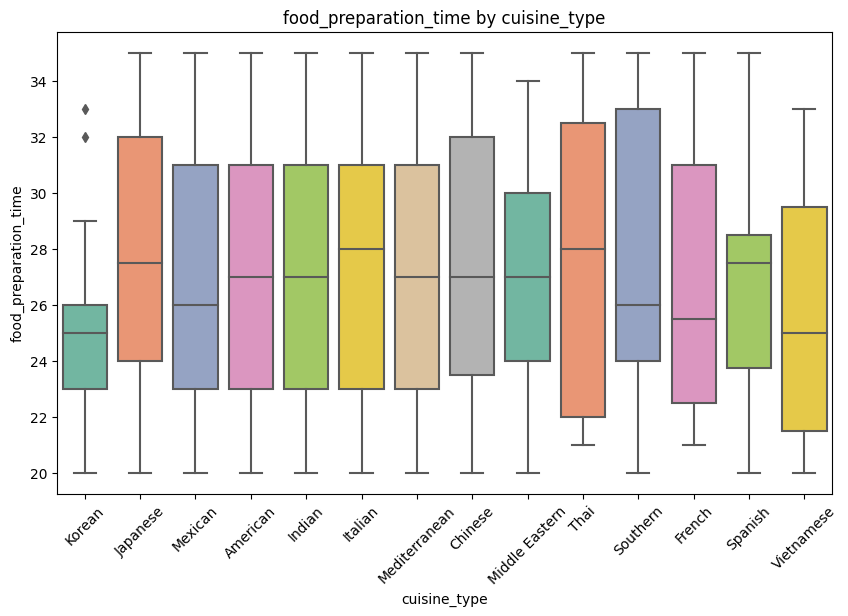

In [ ]:
# displaying boxplot to showcase food_preparation_time by cuisine_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='Set2')
plt.title('food_preparation_time by cuisine_type')
plt.xlabel('cuisine_type')
plt.ylabel('food_preparation_time')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability if needed
plt.show()

# OBSERVATIONS:
# There is a normal distribution across all cuisine_types but Korean have a few outliers with I assume their big group orders.

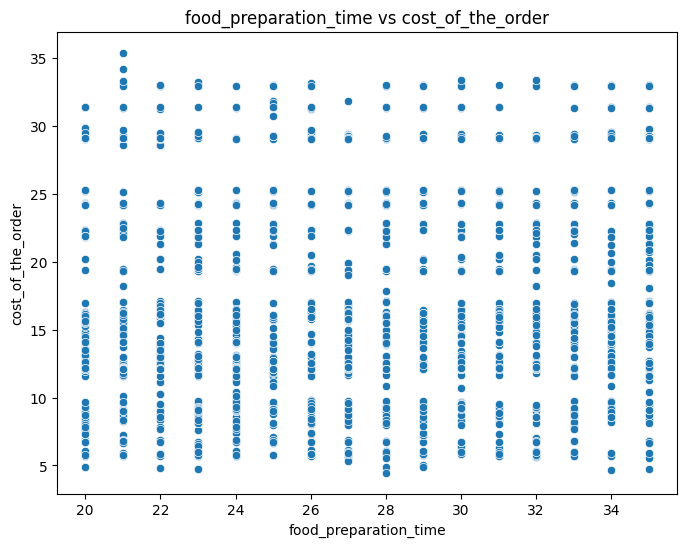

In [ ]:
# displaying scatterplot for closer look at food_preparation_time versus cost_of_the_order
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_preparation_time', y='cost_of_the_order', data=df)
plt.title('food_preparation_time vs cost_of_the_order')
plt.xlabel('food_preparation_time')
plt.ylabel('cost_of_the_order')
plt.show()

# OBSERVATIONS:
# My observations for this are on my subplot, but I wanted a closer look since I thought there would be some
# correlation between these two variables.

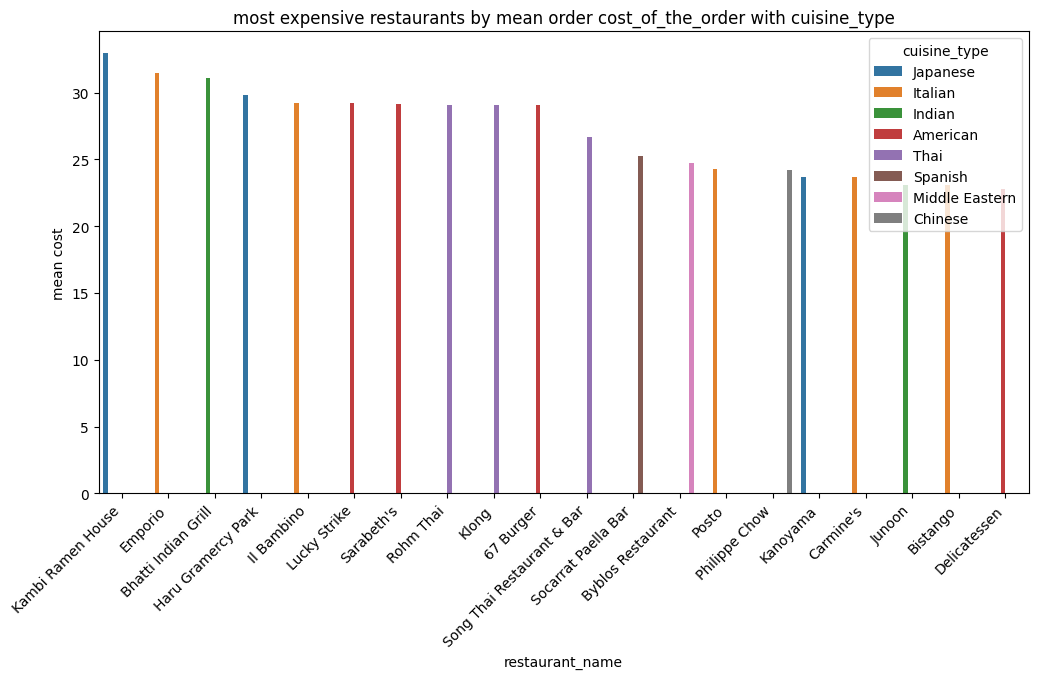

In [ ]:
# finding the most expensive restaurants and their cuisine types by mean order cost
most_expensive_restaurants = df.groupby(['restaurant_name', 'cuisine_type'])['cost_of_the_order'].mean().reset_index()

# Displaying a bar plot with 'cuisine_type' as hue to show the top 20 most expensive restaurants
plt.figure(figsize=(12, 6))
sns.barplot(x='restaurant_name', y='cost_of_the_order', hue='cuisine_type', data=most_expensive_restaurants.sort_values('cost_of_the_order', ascending=False).head(20))
plt.title('most expensive restaurants by mean order cost_of_the_order with cuisine_type')
plt.xlabel('restaurant_name')
plt.ylabel('mean cost')
# Rotating x-axis labels for less clutter
plt.xticks(rotation=45, ha='right')
plt.show()

# OBSERVATIONS:
# Japanese, Italian, and American which are in the top 3 of most orders are also the part of the most expensive with the inclusion
# of thai food.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


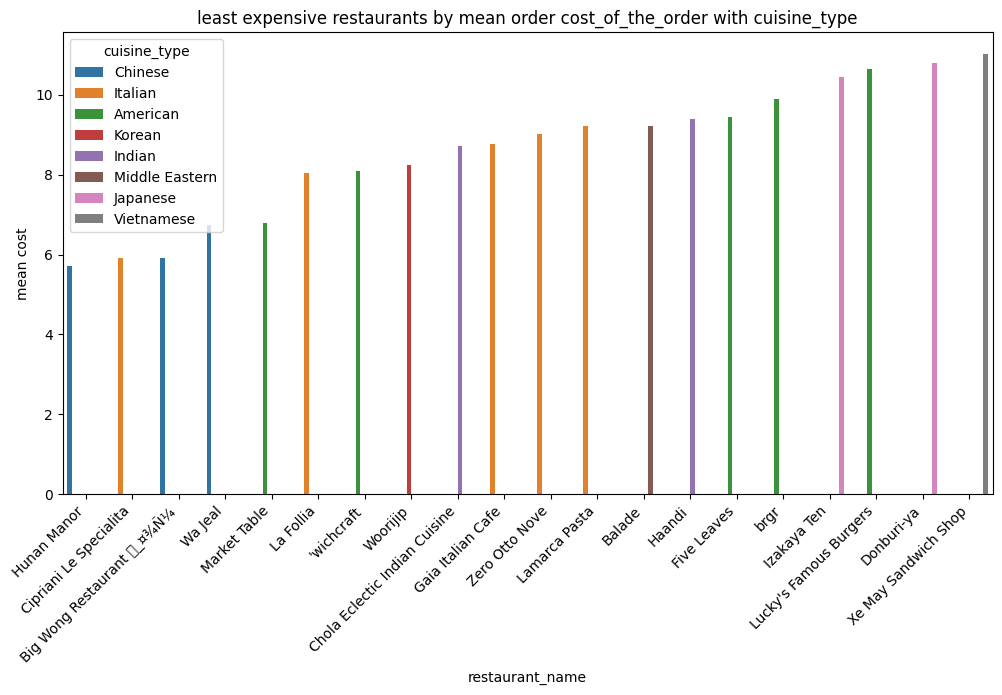

In [ ]:
# finding the least expensive restaurants and their cuisine types by mean order cost
least_expensive_restaurants = df.groupby(['restaurant_name', 'cuisine_type'])['cost_of_the_order'].mean().reset_index()

# Displaying a bar plot with 'cuisine_type' as hue to show the top 20 least expensive restaurants
plt.figure(figsize=(12, 6))
sns.barplot(x='restaurant_name', y='cost_of_the_order', hue='cuisine_type', data=least_expensive_restaurants.sort_values('cost_of_the_order', ascending=True).head(20))
plt.title('least expensive restaurants by mean order cost_of_the_order with cuisine_type')
plt.xlabel('restaurant_name')
plt.ylabel('mean cost')
# Rotating x-axis labels for less clutter
plt.xticks(rotation=45, ha='right')
plt.show()

# OBSERVATIONS:
# American, Italian, and Chinese also having some of the cheapest restaurants by mean cost of orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# grouping the orders by restaurant name and rating
restaurant_rating_count = df.groupby(['restaurant_name', 'rating']).size().reset_index(name='rating_count')

# removing 'Not given' integer equivalent ratings
restaurant_rating_count = df[df['rating'] != -1]

# finding the value counts
restaurant_rating_count = df['restaurant_name'].value_counts()

# finding the restaurants with more than 50 ratings
restaurants_more_than_50 = restaurant_rating_count[restaurant_rating_count > 50]

# getting the list of orders with ratings again
no_not_givens = df[df['rating'] != -1]

# reducing the list to only the restaurants with more than 50 ratings
df_filtered = no_not_givens[no_not_givens['restaurant_name'].isin(restaurants_more_than_50.index)]

# calculate the mean of orders for each restaurant
mean_orders_per_restaurant = df_filtered.groupby('restaurant_name')['rating'].mean().reset_index(name='mean_rating')

# finding which restaurants have a mean rating higher than 4
promotional_offers = mean_orders_per_restaurant[mean_orders_per_restaurant['mean_rating'] > 4]

# printing results
print("The following restaurnts meet the promotional offer requirements:\n", promotional_offers)

# OBSERVATIONS:
# Restaurants with a high number of reviews seem to have high ratins as well.

The following restaurnts meet the promotional offer requirements:
              restaurant_name  mean_rating
0  Blue Ribbon Fried Chicken     4.328125
1          Blue Ribbon Sushi     4.219178
2                       Parm     4.128205
3           RedFarm Broadway     4.243902
4             RedFarm Hudson     4.176471
5                Shake Shack     4.278195
6          The Meatball Shop     4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# finding all orders that cost more than 5 dollars or less than or equal to 20 dollars
temp_more_than_5 = df[(df['cost_of_the_order'] >= 5) & (df['cost_of_the_order'] <= 20)]
# multiplying all of the order costs by 15% to get revenue of each order generated
temp_more_than_5 = temp_more_than_5['cost_of_the_order'] * .15

# finding all orders that cost more than 20 dollars
temp_more_than_20 = df[df['cost_of_the_order'] > 20]
# multiplying all of the order costs by 25% to get revenue of each order generated
temp_more_than_20 = temp_more_than_20['cost_of_the_order'] * .25

# finding the summation of each order in the two series and then adding them to find the net revenue
net_revenue = temp_more_than_5.sum() + temp_more_than_20.sum()

# printing results
print("Net revenue: $", '%.2f'%net_revenue, sep='')

Net revenue: $6166.30


#### Observations: There is no observation given as to how many weeks these orders are from but $6,166.30 is not a lot of money for a fully functioning business.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# creating a series with each orders total preparation and delivery time
total_time = df['food_preparation_time'] + df['delivery_time']

# finding the times that are above 60
more_than_60 = total_time[total_time > 60]

# finding the percentage of the orders above 60 minutes
percentage = more_than_60.shape[0] / df.shape[0] * 100

# printing results
print("The percentage of orders above 60 minutes is %", '%.2f'%percentage, sep = '')

The percentage of orders above 60 minutes is %10.54


#### Observations: Nearly 90% of orders are delivered in an hour or less.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
week_delivery_times = df.groupby(['day_of_the_week'])['delivery_time'].mean()

print(week_delivery_times)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations: Suprisingly the mean delivery time on the weekend is shorter than during the weekday despite there being way more orders on the weekend. I am assuming there are more people ready to deliver trying to make extra cash on the weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There is an unusual regular distribution between many of the variables.
*  There is little correlation between the cost of the order (bigger orders) and the preparation time.
*  There are too many 'Not given' ratings.
*  There seems to be a correlation between the cost of the order and the number of ratings given.

### Recommendations:

*  Provide some sort of promotion in order to incentivize people to provide more ratings. Perhaps offer discounts on orders for having a good rating percentage on customer's orders.
*  After collecting more data on highly rated restaurants, then advertise those restaurants more on the application and offer discounts on deliveries since more deliveries can be taken at once if there are multiple orders each time a delivery person comes.
*  Prioritize smaller orders for deliviries since it may be a detterant to people if it generally takes an hour for any order if their order is something small. It is understandable for a 30 dollar order that probably has two entrees and maybe an appetizer, but not for a 5 dollar order that is like a muffin or a side dish.

---